# Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


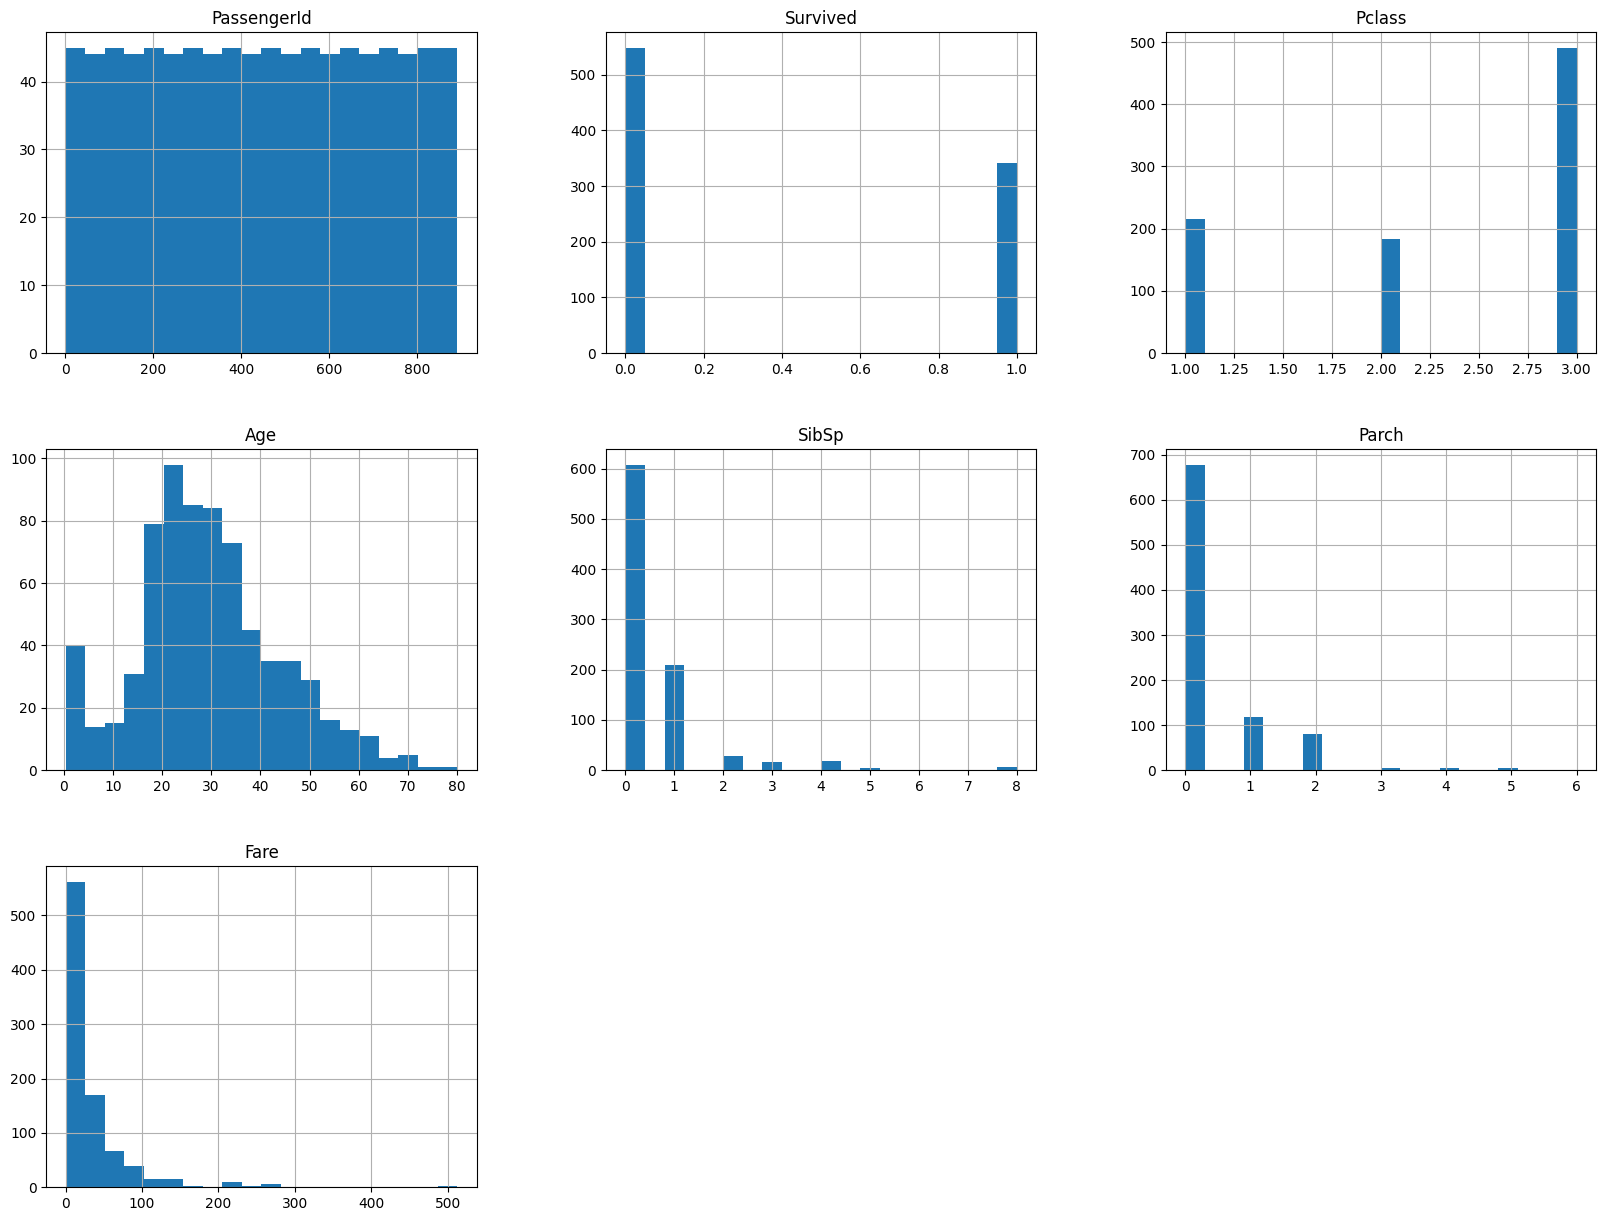

In [9]:
df.hist(bins=20, figsize=(20, 15))
plt.show()


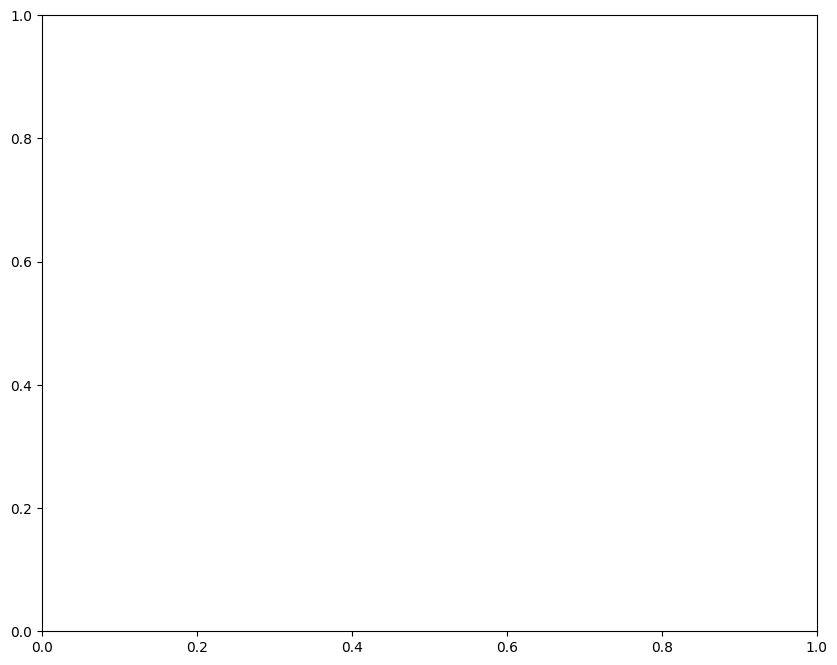

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(df=df)
plt.show()

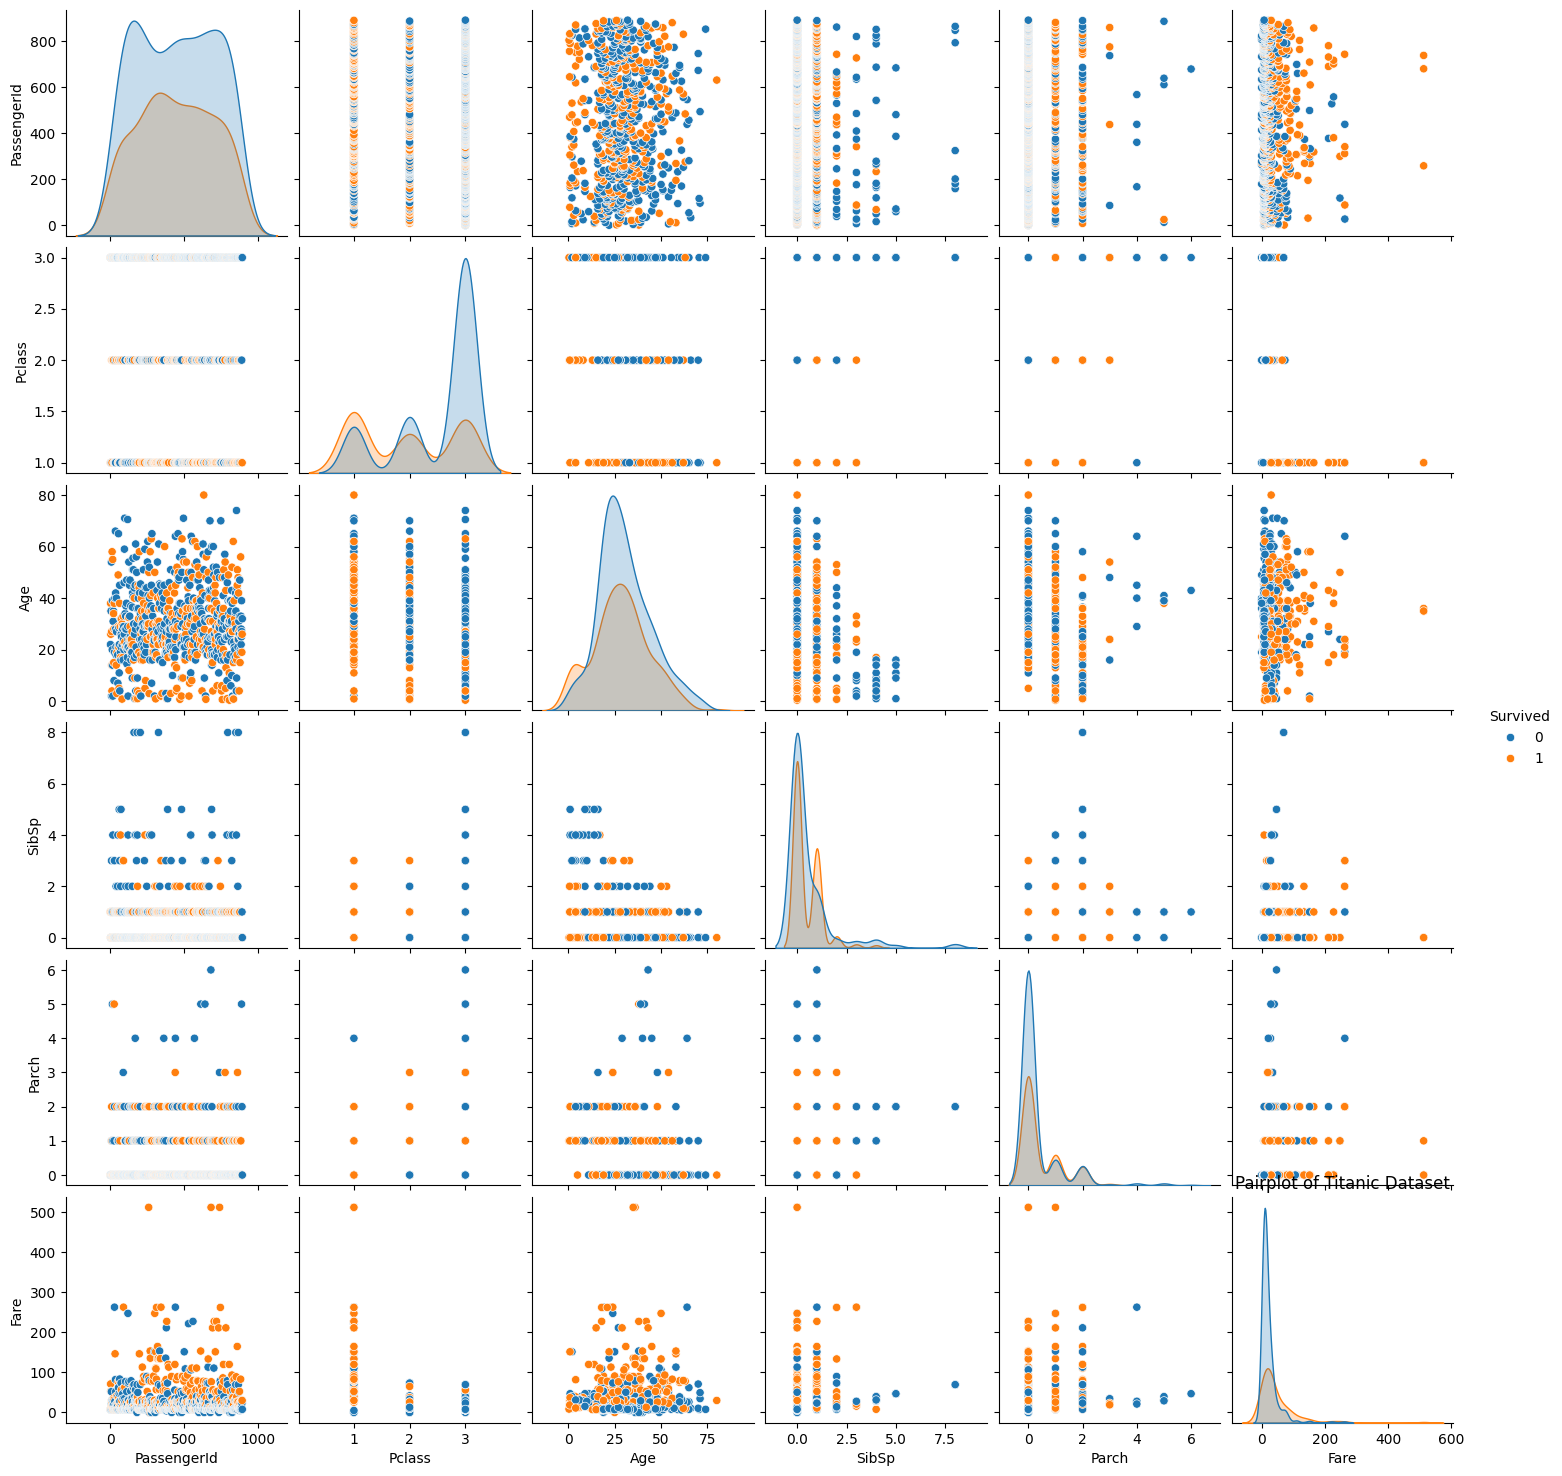

In [11]:
sns.pairplot(df, hue='Survived')
plt.title('Pairplot of Titanic Dataset')
plt.show()

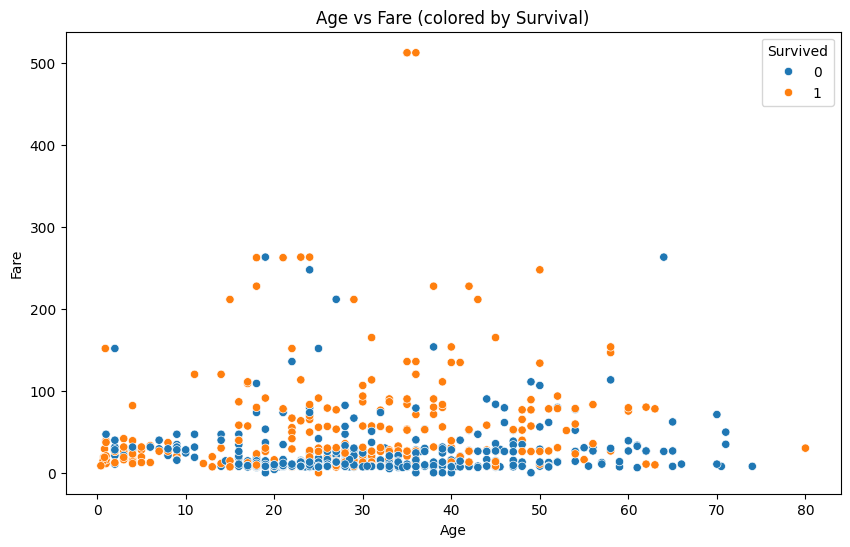

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare (colored by Survival)')
plt.show()

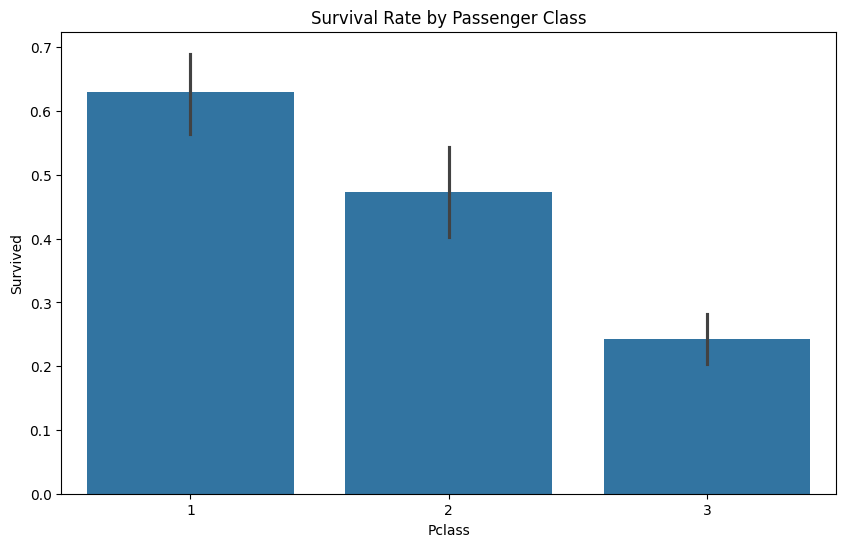

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Data Preprocessing

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
df.drop('Cabin', axis=1, inplace=True)

In [19]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


In [21]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Sex_male,0


In [22]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
347088,6
S.O.C. 14879,5
382652,5
LINE,4


In [23]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Sex_male,bool


In [28]:
X=df.drop(['Survived','Ticket','Name','Sex_male'],axis=1)
y=df['Survived']

In [29]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# Building Predictive Models

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,True,False,True
733,2,23.0,0,0,13.0000,True,False,True
382,3,32.0,0,0,7.9250,True,False,True
704,3,26.0,1,0,7.8542,True,False,True
813,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,False,True
270,1,28.0,0,0,31.0000,True,False,True
860,3,41.0,2,0,14.1083,True,False,True
435,1,14.0,1,2,120.0000,False,False,True


In [34]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
118,0
536,0
361,0
29,0
55,1


In [35]:
X_train.isna().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [36]:
X_test.isna().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [47]:
print(f'Accuracy: {accuracy_score}')
print(f'Precision: {precision_score}')
print(f'Recall: {recall_score}')
print(f'F1 Score: {f1_score}')

Accuracy: <function accuracy_score at 0x7b34558a5fc0>
Precision: <function precision_score at 0x7b34558a6dd0>
Recall: <function recall_score at 0x7b34558a6ef0>
F1 Score: <function f1_score at 0x7b34558a67a0>


LightGBM Model

In [39]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [40]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [41]:
y_pred_lgb = lgb_model.predict(X_test)
lgb_metrics = evaluate_model(y_test, y_pred_lgb)
print('LightGBM Metrics:', lgb_metrics)

LightGBM Metrics: (0.8268156424581006, 0.7945205479452054, 0.7837837837837838, 0.7891156462585033)


XGBoost Model

In [48]:
import xgboost as xgb

In [50]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)
print('XGBoost Metrics:', xgb_metrics)

XGBoost Metrics: (0.8212290502793296, 0.8, 0.7567567567567568, 0.7777777777777778)


Cross-Validation and Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [57]:
lgb_param_grid = {
    'num_leaves': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}


In [58]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid_search.fit(X_train, y_train)
print('Best Parameters for LightGBM:', lgb_grid_search.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFro

In [55]:
xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}


In [56]:
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print('Best Parameters for XGBoost:', xgb_grid_search.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Comparative Analysis

In [59]:
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_metrics[0], xgb_metrics[0]],
    'Precision': [lgb_metrics[1], xgb_metrics[1]],
    'Recall': [lgb_metrics[2], xgb_metrics[2]],
    'F1-Score': [lgb_metrics[3], xgb_metrics[3]]
})

In [60]:
print(metrics_df)

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.826816   0.794521  0.783784  0.789116
1   XGBoost  0.821229   0.800000  0.756757  0.777778


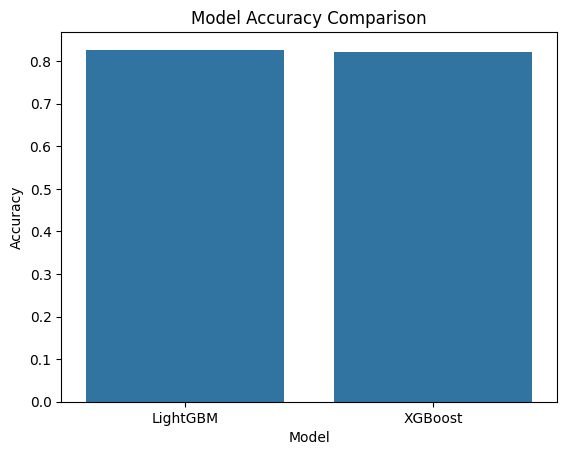

In [64]:
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Model Accuracy Comparison')
plt.show()


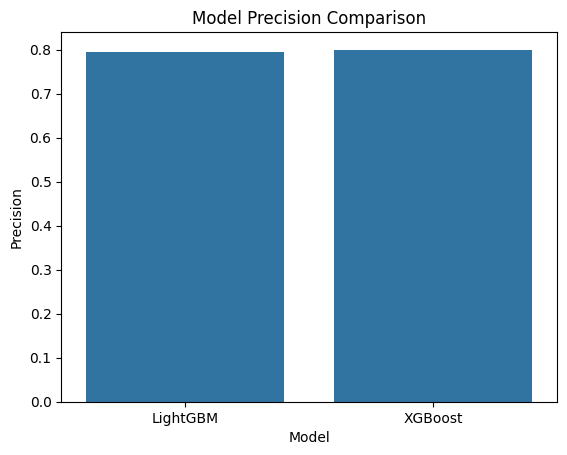

In [65]:
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Model Precision Comparison')
plt.show()

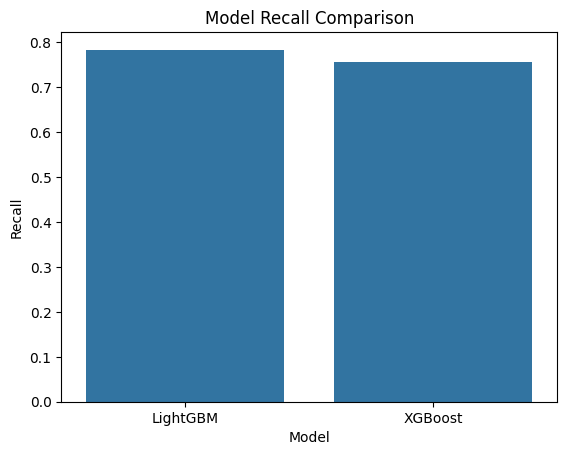

In [66]:
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Model Recall Comparison')
plt.show()


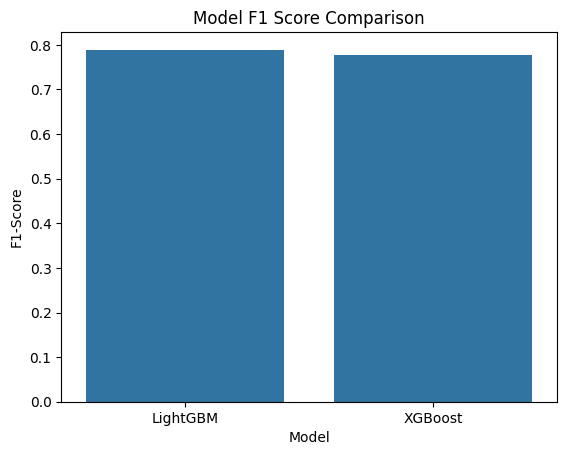

In [68]:
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
plt.title('Model F1 Score Comparison')
plt.show()


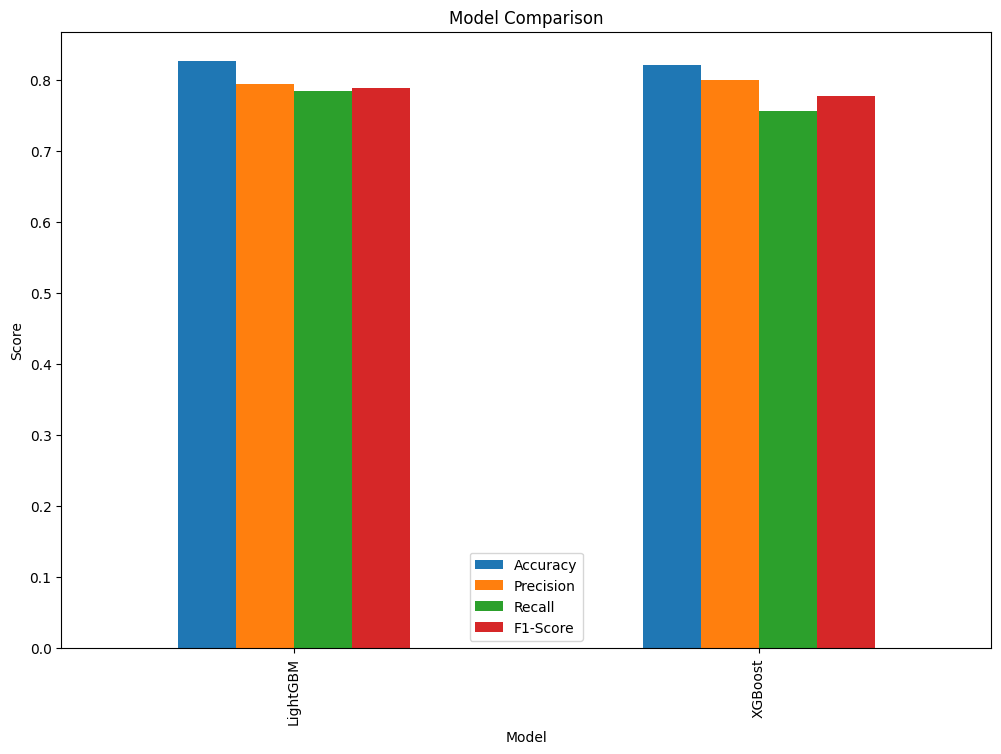

In [61]:
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()